# Prosper-Loan-Data
## by Ghazal AbuFarha
2025-Feb-2025


## Introduction

### What is the structure of this dataset?

> The dataset contains 113,937 rows (loans) and 81 columns (features). Each row represents a unique loan, and the columns provide details about the borrower, loan terms, financial information, and loan performance.
>Key data types:
Numerical: Continuous variables like LoanOriginalAmount, BorrowerRate, and DebtToIncomeRatio.
Categorical: Variables like LoanStatus, EmploymentStatus, and IncomeRange.
Dates: Columns like LoanOriginationDate and ListingCreationDate.

### The main feature(s) of interest in this dataset?

> Analyzing loan trends.

### What features in the dataset do i think will help support my investigation into my feature(s) of interest?

- **LoanOriginationDate and LoanOriginationQuarter**: Identify trends in loan amounts, ratings, and borrower interest rates.

- **LoanOriginalAmount**: Understand average loan size and growth trends.

- **ListingCategory**: Determine common loan purposes, like debt consolidation or home improvement.

- **BorrowerRate**: Discover trends in interest rates offered over time.

- **ProsperRating or ProsperScore**: Analyze the distribution of credit ratings and borrower quality.

- **IncomeRange and CreditScoreRangeLower / Upper**: Investigate changes in borrower characteristics, such as income and credit scores.

## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in dataset and describe its properties:*italicized text*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prosper-Loan-Data/prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#print columns name
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

>Cleaning The Data

In [5]:
#dropping unusfule column from Data dataset
columns_to_drop = [
    'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate',
    'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore',
    'GroupKey', 'CurrentlyInGroup', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines',
    'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
    'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
    'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
    'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeVerifiable', 'TotalProsperLoans',
    'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
    'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
    'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
    'LoanMonthsSinceOrigination', 'LoanNumber', 'MemberKey'
]
data = data.drop(columns=columns_to_drop)


In [6]:
#checking null value
data.isnull().sum()

,0
Term,0
LoanStatus,0
BorrowerAPR,25
BorrowerRate,0
ProsperRating (numeric),29084
ProsperRating (Alpha),29084
ListingCategory (numeric),0
BorrowerState,5515
Occupation,3588
EmploymentStatus,2255


In [7]:
#filling some  null value with high repetition
data['ProsperRating (numeric)'] = data['ProsperRating (numeric)'].fillna('N/A')
data['ProsperRating (Alpha)'] = data['ProsperRating (Alpha)'].fillna('N/A')

In [8]:
#dropping other null values
data.dropna(inplace=True)

In [9]:
#checking
data.isnull().sum()

,0
Term,0
LoanStatus,0
BorrowerAPR,0
BorrowerRate,0
ProsperRating (numeric),0
ProsperRating (Alpha),0
ListingCategory (numeric),0
BorrowerState,0
Occupation,0
EmploymentStatus,0


In [10]:
#dropping duplicates rows
data= data.drop_duplicates()

In [11]:
# Check for duplicates
data.duplicated().sum()

0

In [12]:
# Creating a dictionary of old column names to new column names
new_column_names = {
    'Term': 'term',
    'LoanStatus': 'loan_status',
    'BorrowerAPR': 'borrower_apr',
    'BorrowerRate': 'borrower_rate',
    'ProsperRating (numeric)': 'prosper_rating_numeric',
    'ProsperRating (Alpha)': 'prosper_rating_alpha',
    'ListingCategory (numeric)': 'listing_category_numeric',
    'BorrowerState': 'borrower_state',
    'Occupation': 'occupation',
    'EmploymentStatus': 'employment_status',
    'EmploymentStatusDuration': 'employment_status_duration',
    'IsBorrowerHomeowner': 'is_borrower_homeowner',
    'CreditScoreRangeLower': 'credit_score_range_lower',
    'CreditScoreRangeUpper': 'credit_score_range_upper',
    'CurrentDelinquencies': 'current_delinquencies',
    'AmountDelinquent': 'amount_delinquent',
    'DelinquenciesLast7Years': 'delinquencies_last_7_years',
    'TotalTrades': 'total_trades',
    'IncomeRange': 'income_range',
    'StatedMonthlyIncome': 'stated_monthly_income',
    'LoanKey': 'loan_key',
    'LoanOriginalAmount': 'loan_original_amount',
    'LoanOriginationDate': 'loan_origination_date',
    'LoanOriginationQuarter': 'loan_origination_quarter',
    'MonthlyLoanPayment': 'monthly_loan_payment',
    'LP_CustomerPayments': 'lp_customer_payments',
    'LP_CustomerPrincipalPayments': 'lp_customer_principal_payments',
    'LP_InterestandFees': 'lp_interest_and_fees',
    'LP_ServiceFees': 'lp_service_fees',
    'LP_CollectionFees': 'lp_collection_fees',
    'LP_GrossPrincipalLoss': 'lp_gross_principal_loss',
    'LP_NetPrincipalLoss': 'lp_net_principal_loss',
    'LP_NonPrincipalRecoverypayments': 'lp_non_principal_recovery_payments',
    'PercentFunded': 'percent_funded',
    'Recommendations': 'recommendations',
    'InvestmentFromFriendsCount': 'investment_from_friends_count',
    'InvestmentFromFriendsAmount': 'investment_from_friends_amount',
    'Investors': 'investors'
}

# Renaming the columns
data.rename(columns=new_column_names, inplace=True)


In [13]:
print(data.columns)

Index(['term', 'loan_status', 'borrower_apr', 'borrower_rate',
       'prosper_rating_numeric', 'prosper_rating_alpha',
       'listing_category_numeric', 'borrower_state', 'occupation',
       'employment_status', 'employment_status_duration',
       'is_borrower_homeowner', 'credit_score_range_lower',
       'credit_score_range_upper', 'current_delinquencies',
       'amount_delinquent', 'delinquencies_last_7_years', 'total_trades',
       'income_range', 'stated_monthly_income', 'loan_key',
       'loan_original_amount', 'loan_origination_date',
       'loan_origination_quarter', 'monthly_loan_payment',
       'lp_customer_payments', 'lp_customer_principal_payments',
       'lp_interest_and_fees', 'lp_service_fees', 'lp_collection_fees',
       'lp_gross_principal_loss', 'lp_net_principal_loss',
       'lp_non_principal_recovery_payments', 'percent_funded',
       'recommendations', 'investment_from_friends_count',
       'investment_from_friends_amount', 'investors'],
      dtype='

In [14]:
data['loan_origination_date'] = pd.to_datetime(data['loan_origination_date'], errors='coerce')
data['loan_origination_year'] = data['loan_origination_date'].dt.year


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102415 entries, 0 to 113936
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   term                                102415 non-null  int64         
 1   loan_status                         102415 non-null  object        
 2   borrower_apr                        102415 non-null  float64       
 3   borrower_rate                       102415 non-null  float64       
 4   prosper_rating_numeric              102415 non-null  object        
 5   prosper_rating_alpha                102415 non-null  object        
 6   listing_category_numeric            102415 non-null  int64         
 7   borrower_state                      102415 non-null  object        
 8   occupation                          102415 non-null  object        
 9   employment_status                   102415 non-null  object        
 10  employment_st

In [16]:
#print some rows
data.head()

,term,loan_status,borrower_apr,borrower_rate,prosper_rating_numeric,prosper_rating_alpha,listing_category_numeric,borrower_state,occupation,employment_status,...,lp_collection_fees,lp_gross_principal_loss,lp_net_principal_loss,lp_non_principal_recovery_payments,percent_funded,recommendations,investment_from_friends_count,investment_from_friends_amount,investors,loan_origination_year
0,36,Completed,0.16516,0.1580,N/A,N/A,0,CO,Other,Self-employed,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,36,Current,0.12016,0.0920,6.0,A,2,CO,Professional,Employed,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
3,36,Current,0.12528,0.0974,6.0,A,16,GA,Skilled Labor,Employed,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,36,Current,0.24614,0.2085,3.0,D,2,MN,Executive,Employed,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013
5,60,Current,0.15425,0.1314,5.0,B,1,NM,Professional,Employed,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2013


> Save cleaned data version

# Exploaring

>Create a Function

In [17]:
def plot_label(title,x_lable,y_lable,rotation,fontsize):
  plt.title(title,fontsize=14, fontweight='bold')
  plt.xlabel(x_lable, fontsize=fontsize)
  plt.ylabel(y_lable, fontsize=fontsize)
  plt.xticks(rotation=rotation)
  plt.grid(True)
  plt.show()

## Univariate Exploration

###Q1: How much do people borrow?



In [18]:
print(data['loan_original_amount'].describe())


count    102415.000000
mean       8588.576927
std        6275.847219
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max       35000.000000
Name: loan_original_amount, dtype: float64


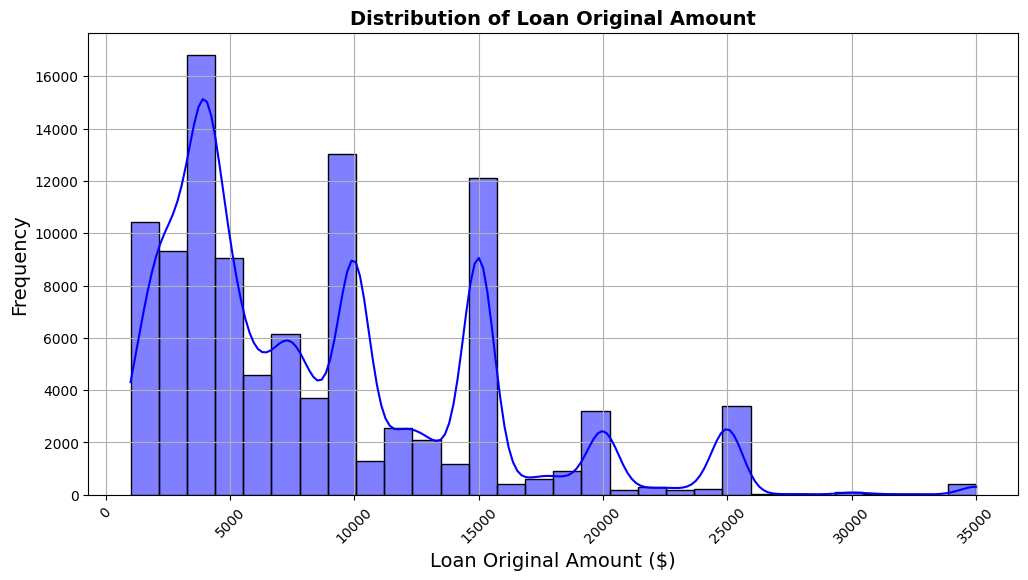

In [19]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the histogram
sns.histplot(data['loan_original_amount'], bins=30, kde=True, color='blue')
# Add title and labels
plot_label('Distribution of Loan Original Amount', 'Loan Original Amount ($)', 'Frequency', 45,14)
#The loan amounts range from $0 to $35,000, with significant frequencies occurring at approximately $5,000, $10,000, $15,000, and $20,000.

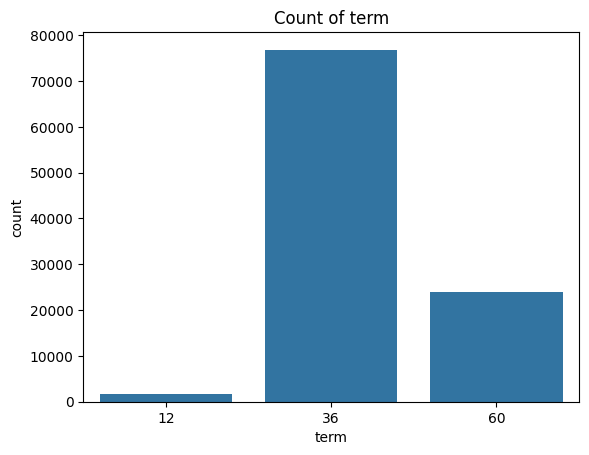

In [20]:
sns.countplot(x=data['term'])
# Add title
plt.title("Count of term")
# Show the plot
plt.show()
#Loans are typically offered for terms of 12, 36, or 60 months, with 36 months being the most common choice.

### Q2 : How do ProsperRating/ProsperScore, IncomeRange, and CreditScoreRange impact borrower assessment?

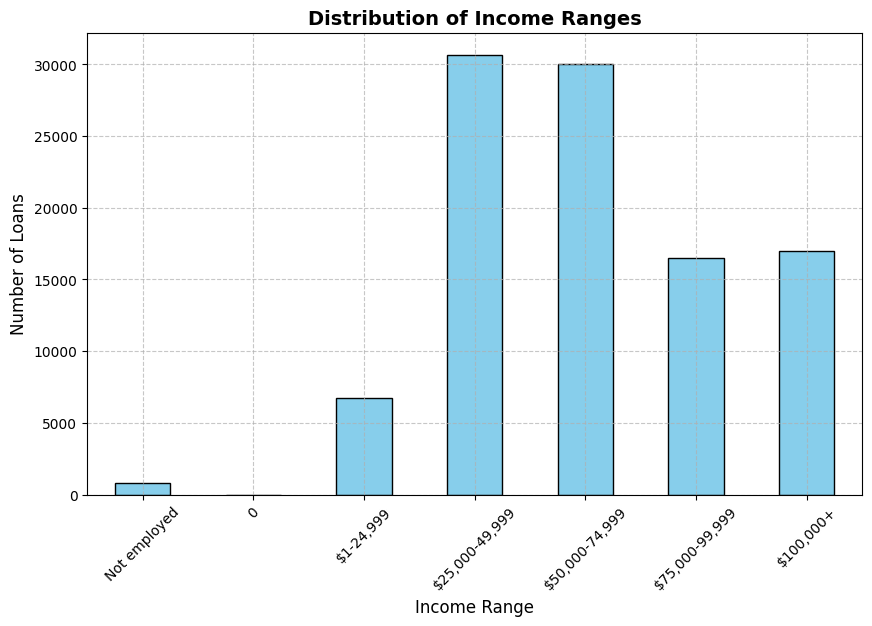

In [21]:
# Define the desired order for the x-axis
income_order = ['Not employed', '0', '$1-24,999', '$25,000-49,999',
                '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Convert 'income_range' to categorical type with the specified order
data['income_range'] = pd.Categorical(data['income_range'], categories=income_order, ordered=True)

# Count occurrences and reindex to match the defined order
income_range_counts = data['income_range'].value_counts().reindex(income_order)
# Plot the bar chart ordered by frequency
plt.figure(figsize=(10, 6))
income_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
# Adding title and labels
plot_label('Distribution of Income Ranges', 'Income Range', 'Number of Loans', 45,12)
#The income range of the borrower at the time the listing was created.
# income_range    |  #NO
# $25,000-49,999  |  30683
# $50,000-74,999  |  30010
# $100,000+       | 16985
# $75,000-99,999  |  16509
# $1-24,999       |   6749
# Not employed    |    778
# $0              |    600
# Not displayed   |    101

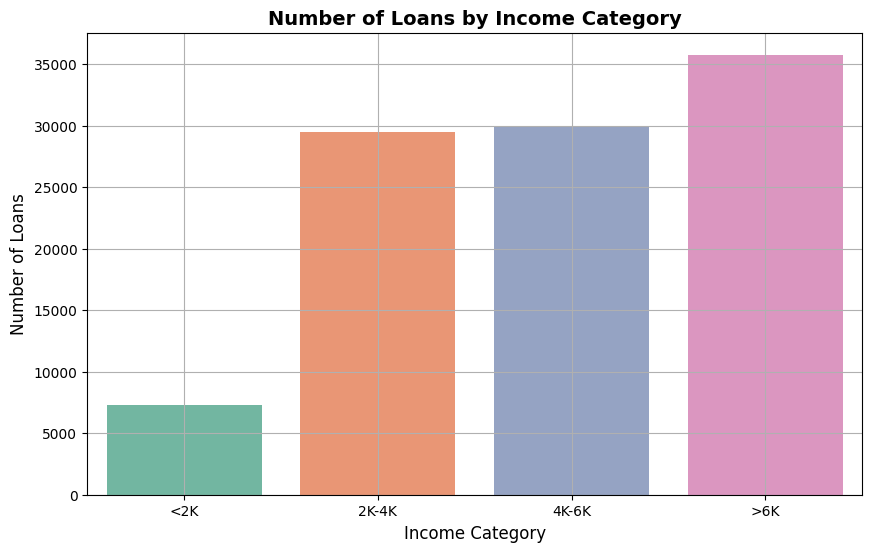

In [22]:
bins = [0, 2000, 4000, 6000, float('inf')]
labels = ['<2K', '2K-4K', '4K-6K', '>6K']
data['IncomeCategory'] = pd.cut(data['stated_monthly_income'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeCategory', data=data, palette='Set2',hue='IncomeCategory', legend=False)
plot_label('Number of Loans by Income Category', 'Income Category', 'Number of Loans', 0,12)

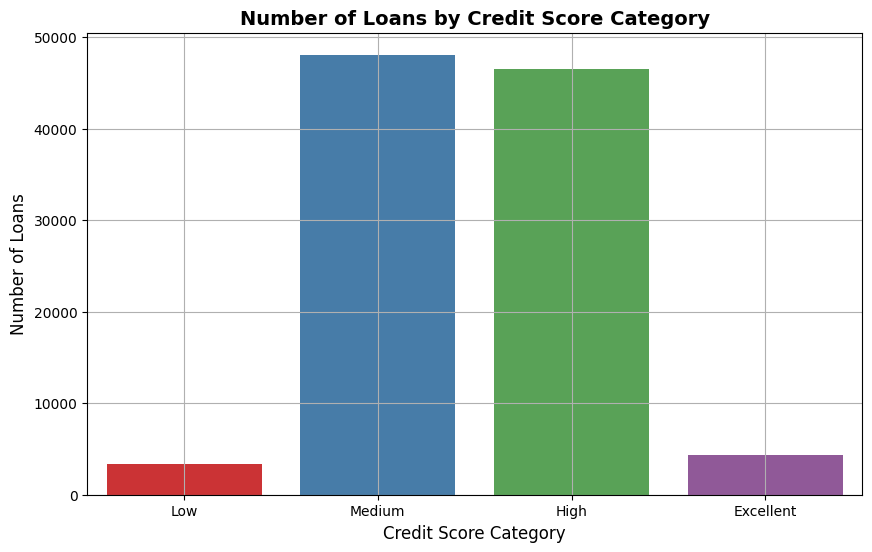

In [23]:
data['credit_score_avg'] = (data['credit_score_range_lower'] + data['credit_score_range_upper']) / 2

score_bins = [0, 600, 700, 800, 850]
score_labels = ['Low', 'Medium', 'High', 'Excellent']
data['CreditScoreCategory'] = pd.cut(data['credit_score_avg'], bins=score_bins, labels=score_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='CreditScoreCategory', data=data, palette='Set1',hue='CreditScoreCategory', legend=False)
#freq = rows =loans
plot_label('Number of Loans by Credit Score Category', 'Credit Score Category', 'Number of Loans', 0,12)

### All the results were logical and reasonable. The available loan amounts span from $0 to $35,000, showcasing a striking frequency at key intervals of approximately $5,000, $10,000, $15,000, and $20,000. Notably, The number of investors contributing to the loan is typically fewer than 200 per loan, fostering an intimate lending environment. Debt consolidation emerges as the primary motivation for borrowing, reflecting the pressing financial needs of borrowers. Loans are offered with terms of 12, 36, or 60 months, with the 36-month option standing out as the overwhelmingly preferred choice among borrowers. The likelihood of obtaining a loan increases with both higher income and higher credit scores. Individuals with higher incomes generally have a better ability to secure loans. Additionally, those with higher credit scores are often granted more loans since they are viewed as less risky by financial institutions.

## Bivariate Exploration

### What is the interest rate paid by the borrower (BorrowerRate)?

In [24]:
max_borrower_apr = data['borrower_rate'].max()

print(f"The maximum value in the 'borrower_apr' column is: {max_borrower_apr}")

The maximum value in the 'borrower_apr' column is: 0.36


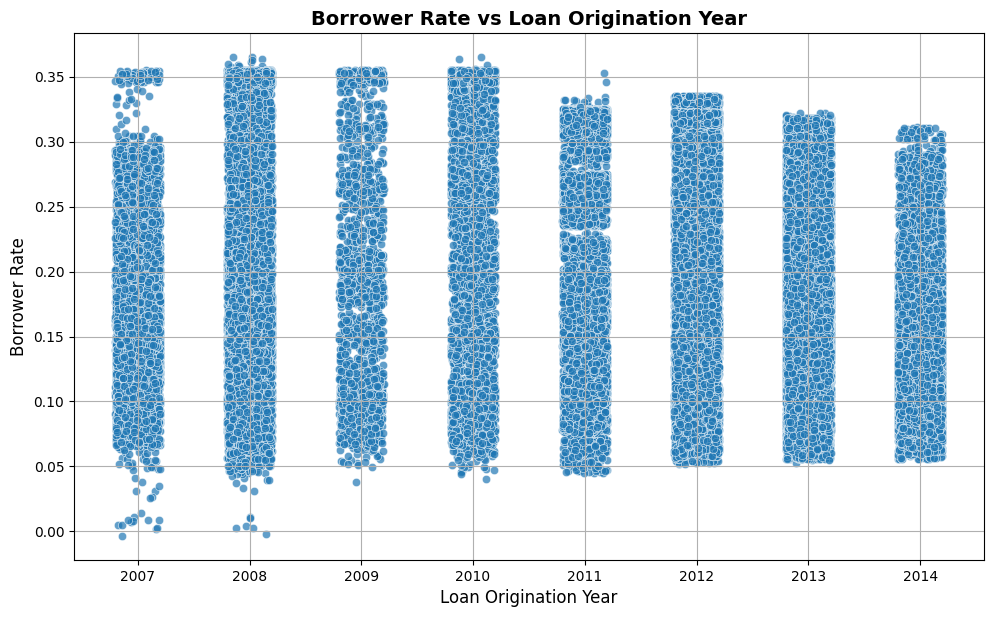

In [25]:
# Apply jitter to loan_origination_year and borrower_rate
jittered_x = data['loan_origination_year'] + np.random.uniform(-0.2, 0.2, size=len(data))
jittered_y = data['borrower_rate'] + np.random.uniform(-0.005, 0.005, size=len(data))

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=jittered_x, y=jittered_y, alpha=0.7)

# Add labels and title
plt.tight_layout()
plot_label('Borrower Rate vs Loan Origination Year', 'Loan Origination Year', 'Borrower Rate', 0,12)

In [26]:
# Convert the Series to a DataFrame and reset the index
yearly_loan_amount = data.groupby('loan_origination_year')['loan_original_amount'].mean().round(2).reset_index()

# Rename the columns for clarity
yearly_loan_amount.columns = ['Loan Origination Year', 'Mean Loan Original Amount']

# Display the table
print(yearly_loan_amount)

   Loan Origination Year  Mean Loan Original Amount
0                   2007                    7287.00
1                   2008                    6020.71
2                   2009                    4354.86
3                   2010                    4768.82
4                   2011                    6692.02
5                   2012                    7834.68
6                   2013                   10610.96
7                   2014                   12095.25


### Q2 : How do loan values ​​change from year to year?

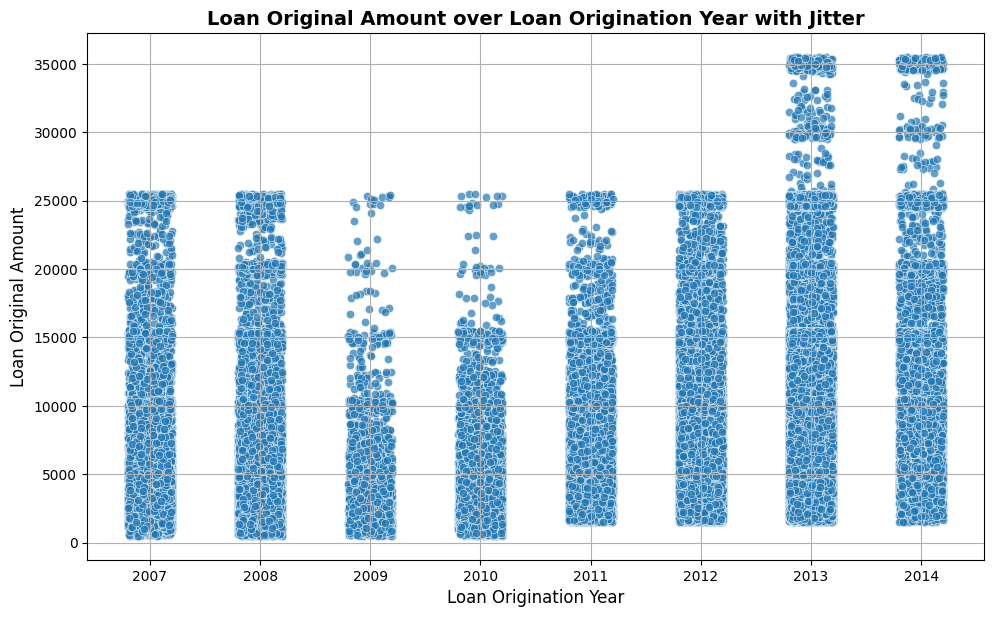

In [27]:
# Apply jitter to loan_origination_year and loan_original_amount
jittered_x = data['loan_origination_year'] + np.random.uniform(-0.2, 0.2, size=len(data))
jittered_y = data['loan_original_amount'] + np.random.uniform(-500, 500, size=len(data))  # Adjust jitter based on scale

# Create scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=jittered_x, y=jittered_y, alpha=0.7)

# Add labels and title
plt.tight_layout()
plot_label('Loan Original Amount over Loan Origination Year with Jitter', 'Loan Origination Year', 'Loan Original Amount', 0,12)

#The loan amount almost did not exceed $25,000 until 2013.

### Q3 : What are the most requested loan types—debt consolidation or home improvement? What type of loan is most commonly requested?

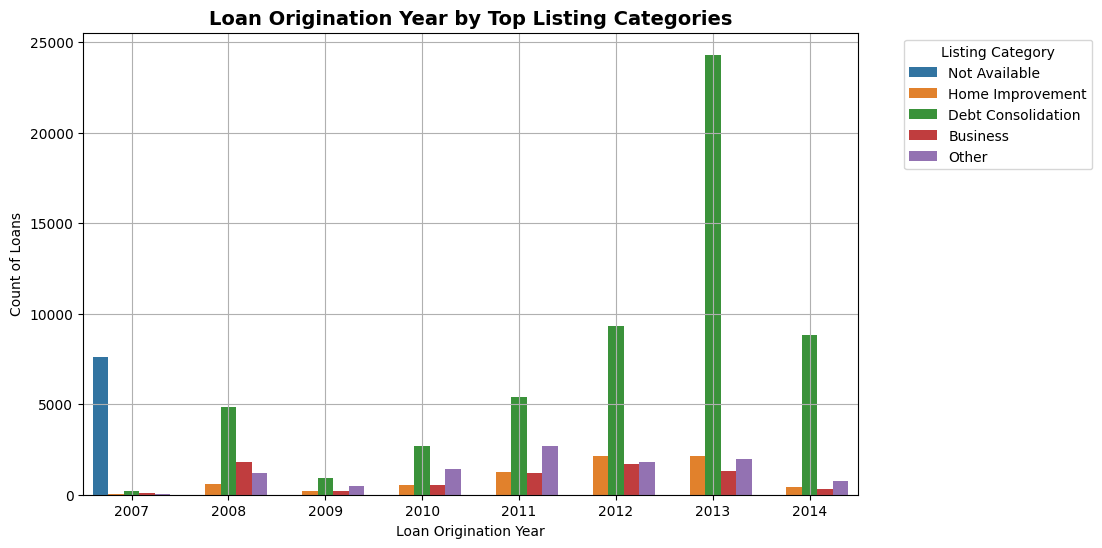

In [28]:
# Mapping for listing_category_numeric to descriptive names
listing_category_map = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby & Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}

# Apply the mapping and creat new column
data['listing_category'] = data['listing_category_numeric'].map(listing_category_map)# Get the top N listing categories by count
top_categories = data['listing_category'].value_counts().nlargest(5).index

# Filter the data to include only the top categories
filtered_data = data[data['listing_category'].isin(top_categories)]

# Plot the clustered bar chart with filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_origination_year', hue='listing_category', data=filtered_data)
plt.legend(title='Listing Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plot_label('Loan Origination Year by Top Listing Categories', 'Loan Origination Year', 'Count of Loans', 0,10)
#Debt consolidation is the most purpose loan is requested through years


### Q4 : Do loan categories change according to the loan amount over time?

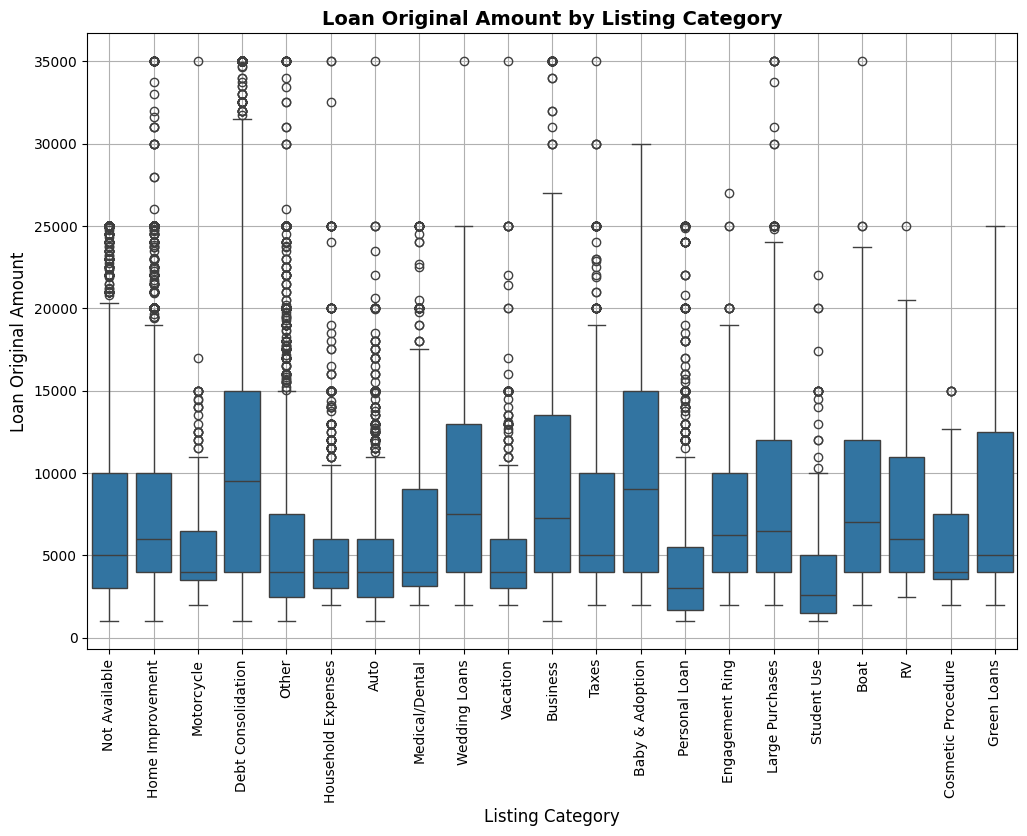

In [29]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='listing_category', y='loan_original_amount', data=data)
plot_label('Loan Original Amount by Listing Category', 'Listing Category', 'Loan Original Amount', 90,12)
#recognizing the variability in loan amounts taken out for various purposes.
#Pricing differs significantly, and there are no standardized values for each category, leading to a considerable presence of outlier data points.

### Between 2008 and 2014, borrowers have faced rates ranging from 0% to 36%, with an observable increase in interest rates year after year, although 0% interest has not been noted post-2008. The average loan amount has steadily risen, particularly influenced by the predominant demand for debt consolidation loans over the years. Notably, until 2013, most loan amounts remained below $25,000, highlighting the variability in borrowing behavior for various purposes. With pricing differing significantly across categories and a lack of standardized values, it's important to consider the considerable presence of outlier data points when analyzing borrowing trends.

## Multivariate Exploration


### Q1 : Do loan interest rates (BorrowerRate) change according to the loan amount over time?

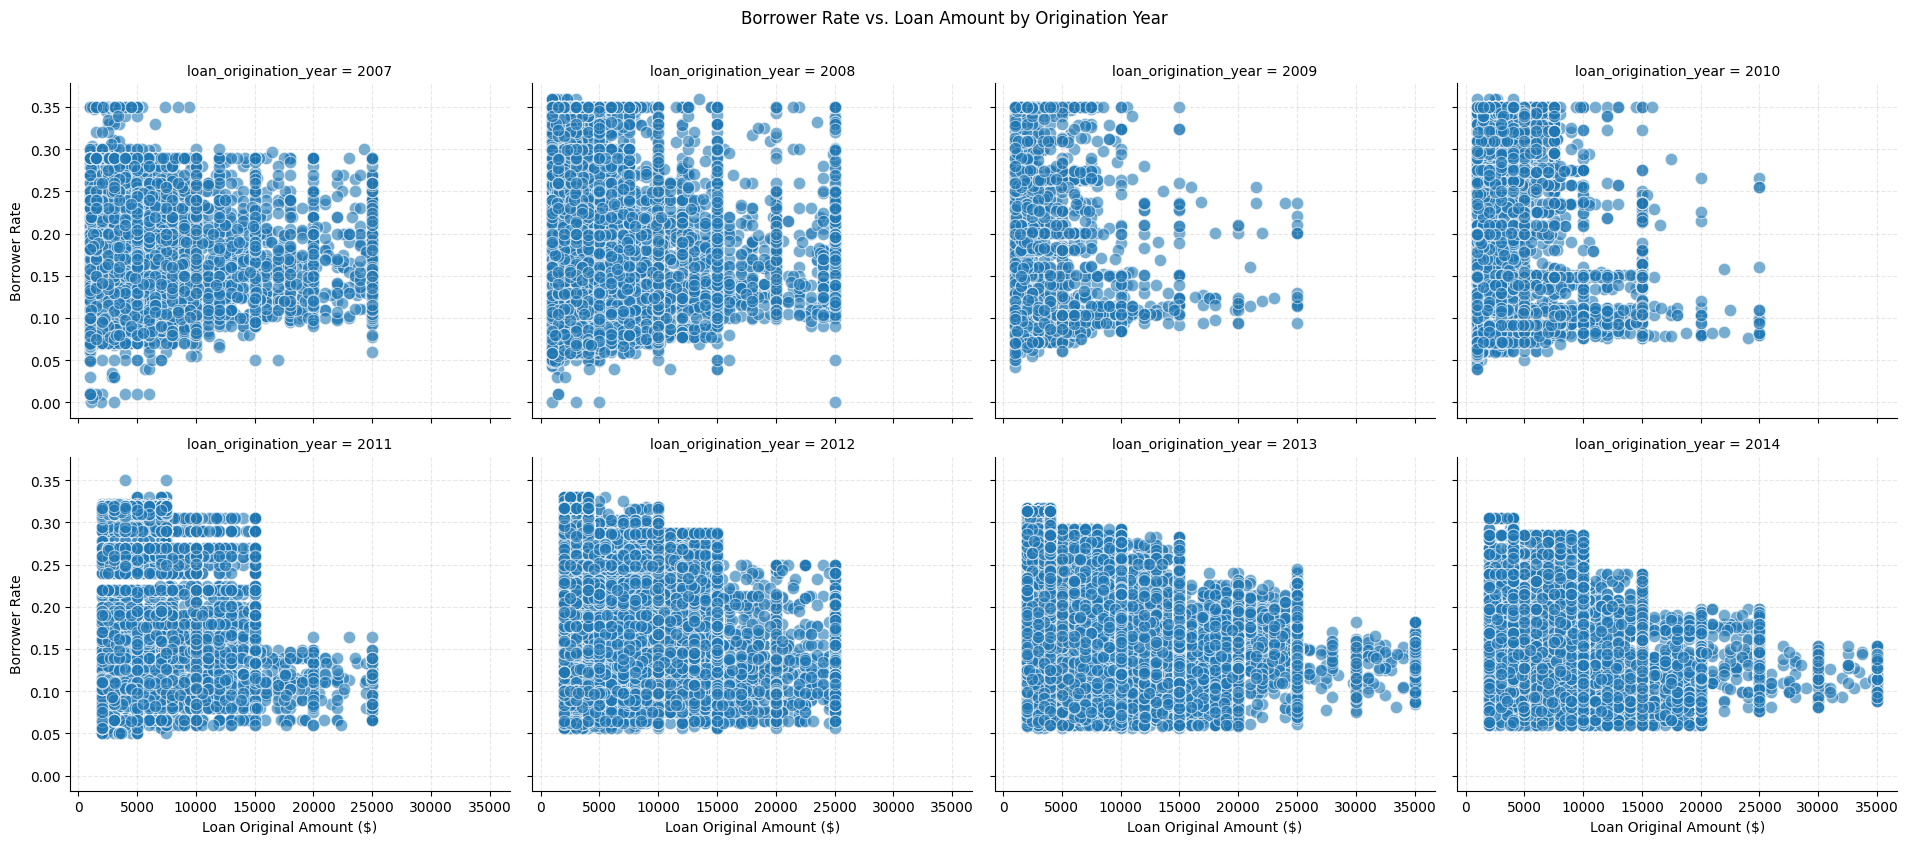

In [30]:
#FacetGrid
g = sns.FacetGrid(data, col="loan_origination_year", col_wrap=4, height=4, aspect=1.2)#
g.map(sns.scatterplot, "loan_original_amount", "borrower_rate",  alpha=0.6, s=80)
g.set_axis_labels("Loan Original Amount ($)", "Borrower Rate")

g.fig.suptitle("Borrower Rate vs. Loan Amount by Origination Year", y=1.05)

for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.3)

plt.show()
# the borrower's rate that borrowers pay is between 0 and 36%
#   The borrower's rate increased from one year to the next,
#   but we did not notice a 0% interest after 2008.

In [31]:
unique_loan_statuses = data['loan_status'].unique()
print("Unique loan statuses in the dataset:", unique_loan_statuses)


Unique loan statuses in the dataset: ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)'
 'Cancelled']


### Q2 : Is loan status affected by the loan amount and the borrower's rate?

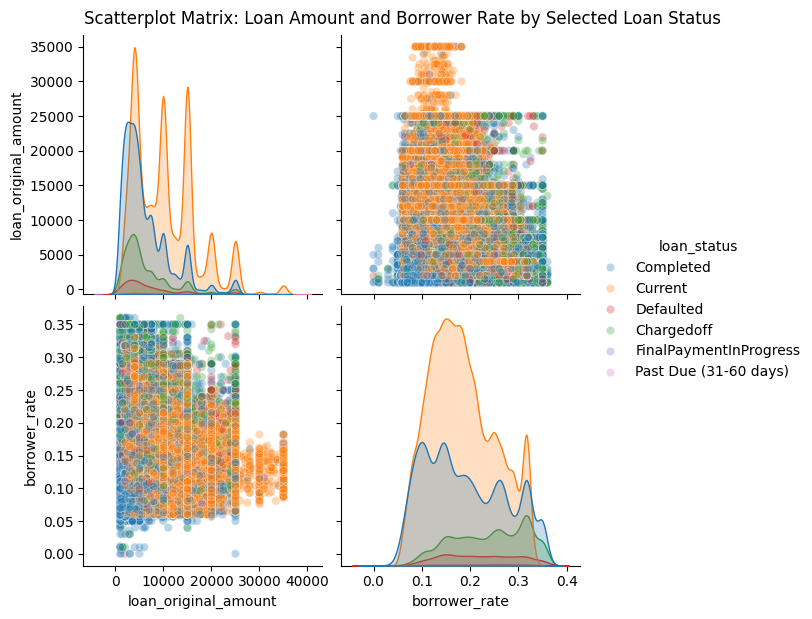

In [32]:
#scatterplot matrix
selected_statuses = ['Completed', 'Current', 'Defaulted', 'Chargedoff', 'FinalPaymentInProgress','Past Due (31-60 days)']

data_subset = data[data['loan_status'].isin(selected_statuses)]

# Select continuous variables
cols = ['loan_original_amount', 'borrower_rate']

# Define a custom color palette
custom_palette = {
    'Completed': '#1f77b4',
    'Current': '#ff7f0e',
    'Defaulted': '#d62728',
    'Chargedoff': '#2ca02c',
    'FinalPaymentInProgress': '#9467bd' ,
    'Past Due (31-60 days)':'#e377c2'
}

# Check if all selected statuses are present in the data
unique_statuses = data_subset['loan_status'].unique()
missing_statuses = [status for status in selected_statuses if status not in unique_statuses]
if missing_statuses:
    print(f"Warning: The following statuses are missing in the data: {missing_statuses}")

# Create the pairplot with only the selected statuses
sns.pairplot(
    data=data_subset,
    vars=cols,
    hue='loan_status',
    hue_order=selected_statuses,  # Ensure the order matches
    palette=custom_palette,  # Apply the custom colors
    diag_kind='kde',
    height=3,
    plot_kws={'alpha':0.3}
)

# Set an overall title
plt.suptitle('Scatterplot Matrix: Loan Amount and Borrower Rate by Selected Loan Status', y=1.02)
plt.show()


Saving the Data

In [33]:
data.to_csv("cleaned_data.csv", index=False)


### The interest rates that borrowers pay range from 0% to 36%. Although the borrower’s rate increased from one year to the next, we did not observe a 0% interest rate after 2008.
### Loan statuses vary in terms of principal amounts and interest rates. Non-performing and delinquent loans typically have higher interest rates and lower principal amounts compared to completed and current loans. Canceled loans exhibit a range of principal amounts and interest rates, while loans in the final repayment phase show moderate variation.

## Conclusions
>In conclusion, the analysis of loan dynamics reveals a stable yet evolving lending landscape characterized by specific borrowing patterns and motivations. The prominent use of loans for debt consolidation highlights the financial strain many borrowers face, while the preference for 36-month terms indicates a trend towards manageable repayment structures. The correlation between higher income and credit scores with loan approval rates underscores the importance of financial stability in securing favorable lending terms. Furthermore, the steady rise in average loan amounts, alongside increasing interest rates, emphasizes the need for ongoing scrutiny of market trends and borrower behavior. The presence of outlier data points highlights variability in borrowing practices, suggesting a nuanced understanding of loan statuses may be required to assess overall lending health and borrower needs effectively.